#-------------------------Phase1------------------------

# Heart Disease Prediction Project

## Project Goal  
Apply classification and clustering to predict the presence of heart disease.

### Classification  
The dataset includes a target attribute called *"target"* with two classes:  
- *0 = No Heart Disease*  
- *1 = Heart Disease*

### Clustering  
The clustering task groups patients with similar characteristics such as *age*, *cholesterol level*, and **maximum heart rate*.  
This helps discover hidden patterns in the data, such as groups of patients that share common health risk factors

**Dataset Source**:

the dataset is taken from kaggle
[Heart Disease Datase](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Raw_dataset.csv to Raw_dataset (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("heart.csv")

print("Shape (rows, columns):", df.shape)

print("\nInfo about dataset:")
df.info()

print("\nClass distribution:")
print(df['target'].value_counts())

print("\nSample rows:")
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'


## Dataset Information  

### Overview  
- *Number of rows (instances):* 1,025  
- *Number of columns (attributes):* 14  

### Attributes (Features)
1. *age* → Age of the patient (Numeric)  
2. *sex* → Gender (1 = Male, 0 = Female) (Binary)  
3. *cp* → Chest pain type (0–3) (Ordinal)  
4. *trestbps* → Resting blood pressure (mm Hg) (Numeric)  
5. *chol* → Serum cholesterol (mg/dl) (Numeric)  
6. *fbs* → Fasting blood sugar (>120 mg/dl, 1 = True, 0 = False) (Binary)  
7. *restecg* → Resting electrocardiographic results (0–2) (Nominal)  
8. *thalach* → Maximum heart rate achieved (Numeric)  
9. *exang* → Exercise induced angina (1 = Yes, 0 = No) (Binary)  
10. *oldpeak* → ST depression induced by exercise (Numeric)  
11. *slope* → Slope of the peak exercise ST segment (0–2) (Ordinal)  
12. *ca* → Number of major vessels (0–4) (Numeric – Discrete)  
13. *thal* → Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect) (Nominal)  
14. *target* → Heart disease presence (0 = No, 1 = Yes) (Binary – Target)  

---

## Target (Class Label)
- *0 = No heart disease (499 instances)*  
- *1 = Heart disease (526 instances)*

###Sample rows:
| age | sex | cp | trestbps | chol | fbs | restecg | thalach | exang | oldpeak | slope | ca | thal | target |
|-----|-----|----|----------|------|-----|---------|---------|-------|---------|-------|----|------|--------|
| 52  | 1   | 0  | 125      | 212  | 0   | 1       | 168     | 0     | 1.0     | 2     | 2  | 3    | 1      |
| 53  | 1   | 0  | 140      | 203  | 1   | 1       | 155     | 1     | 3.1     | 0     | 0  | 3    | 0      |
| 70  | 1   | 0  | 145      | 174  | 0   | 1       | 125     | 1     | 2.6     | 0     | 0  | 3    | 0      |
| 61  | 0   | 0  | 138      | 203  | 0   | 1       | 161     | 0     | 0.0     | 2     | 1  | 3    | 0      |
| 62  | 0   | 0  | 138      | 294  | 1   | 1       | 106     | 0     | 1.9     | 1     | 3  | 2    | 0      |


#-------------------------Phase2------------------------

#1. Load Data

In [ ]:
from google.colab import files
uploaded=files.upload()

# Data before pre-processing

In [ ]:
import pandas as pd

df=pd.read_csv("Raw_dataset.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


#  2. Dataset OverView

This section summarizes the dataset from two angles. First, a structural snapshot using df.info() reports the number of rows and columns, each column’s data type, non-null (non-missing) counts, and memory usage—useful for validating the schema and quickly spotting missing data. Second, a statistical summary using df.describe() characterizes feature distributions: for numeric columns it provides count, mean, std, min, 25%, 50% (median), 75%, max, which helps reveal spread, skewness, and potential outliers; for categorical features, reports count, unique, top, freq. Together, these views establish a clear understanding of both the structure and distribution of the data before preprocessing.

In [ ]:
print(df.info())
#structural snapshot (dtypes, non-null counts, memory) to validate schema and spot missing data

### Attribute Summary Description
----------
The numerical attributes show that the patients are mostly middle-aged, with an average age of 54.4. Resting blood pressure (mean 131.6) and cholesterol (mean 246) are slightly elevated, and both contain noticeable outliers at their maximum values. The maximum heart rate (mean 149) falls within a normal range for this group. ST depression (oldpeak) averages 1.07, indicating generally mild depression with a few high outliers. The number of major vessels (ca) has a low mean of 0.75, showing that most patients have zero or one affected vessel.

The categorical attributes indicate that males form the majority of the dataset (about 70%). Chest pain type 0 is the most common category, and most patients do not have elevated fasting blood sugar. Resting ECG shows category 1 as the most frequent. Most patients do not experience exercise-induced angina, and slope category 1 is the most common. The thal attribute is dominated by category 2, while the target variable shows that 51% of patients have heart disease, making the dataset nearly balanced.

In [ ]:
# Categorical-like columns for this heart dataset (manual list)
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target', 'num']  # include target/num if present

# Keep only columns that actually exist in df
cat_cols = [c for c in cat_cols if c in df.columns]

# Numeric summary (all numeric)
display(df.describe())

# Categorical-style summary (for the listed columns)
if cat_cols:
    display(df[cat_cols].astype('category').describe().T)
else:
    print("No categorical columns from the list were found in this dataset.")

# 3. Detecting Missing Values
---
This cell measures and visualizes missing data in df. It builds a table of missing counts and percentages per column (sorted, showing only columns with any missing) and prints the total missing cells. If missing values exist, it also plots a bar chart to highlight which columns need imputation or special handling in preprocessing.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


missing_cnt = df.isna().sum()
missing_pct = (df.isna().mean() * 100).round(2)

mv = (pd.concat([missing_cnt, missing_pct], axis=1)
        .set_axis(["missing_count", "missing_pct"], axis=1)
        .sort_values("missing_count", ascending=False))

print("🔹 Summary of missing values (columns with any missing):")
display(mv[mv["missing_count"] > 0])

print("🔹 Total missing cells:", int(missing_cnt.sum()))


missing_cnt = df.isna().sum().sort_values(ascending=False)
nz = missing_cnt[missing_cnt > 0]



if not nz.empty:
    nz.plot(kind='bar')
    plt.title('Missing Values per Column')
    plt.xlabel('Column'); plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout(); plt.show()
else:
    print('No missing values in any column.')


🔹 Summary of missing values (columns with any missing):


,missing_count,missing_pct


🔹 Total missing cells: 0
No missing values in any column.


# 4. Missing Value Heatmap
---
 This cell plots a simple heatmap of missing values in the dataset using pure Matplotlib. The function converts the dataframe into a 0/1 mask (1 = missing, 0 = present) and, if the table is large, samples up to a fixed number of rows to keep the plot fast and readable.brighter blocks indicate concentrations of missing data. If no bright blocks appear, there are effectively no missing values to impute

In [ ]:
def plot_missing_heatmap(df: pd.DataFrame, max_rows: int = 3000) -> None:
    """
    Plot a simple heatmap of missing values using matplotlib only.
    - 1 means missing, 0 means present.
    - If the dataset is large, it samples up to `max_rows` rows for speed.
    """
    mask = df.isna().astype(int)
    if len(mask) > max_rows:
        mask = mask.sample(n=max_rows, random_state=42)

    plt.figure(figsize=(10, 5))
    plt.imshow(mask.values, aspect="auto", interpolation="nearest")
    plt.colorbar(label="Missing (1) / Present (0)")
    plt.title("Missing Values Heatmap (sampled if large)")
    plt.xlabel("Columns"); plt.ylabel("Rows")
    plt.tight_layout(); plt.show()

plot_missing_heatmap(df)

# 5. Histogram Description
---
This section visualizes the distribution of key numeric attributes — age, cholesterol, and trestbps — using histograms.
Each histogram displays the frequency of values within intervals, helping identify central tendencies and spread patterns.
The plots reveal that age values are fairly evenly distributed with a slight concentration in middle-aged patients, while cholesterol shows a right-skewed distribution, indicating that most patients have moderate cholesterol levels with a few high values.
Similarly, trestbps (resting blood pressure) clusters around typical healthy ranges, with fewer instances of very high readings.
Overall, histograms provide an intuitive understanding of how patient characteristics are distributed across the dataset.

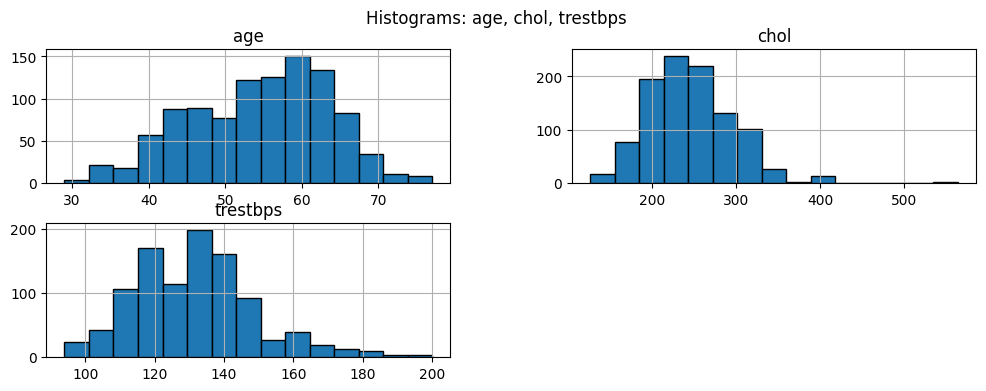

In [ ]:
cols_hist = [c for c in ['age','chol','trestbps'] if c in df.columns] or num_cols[:3]
df[cols_hist].hist(bins=15, figsize=(12,4), edgecolor='black')
plt.suptitle(f"Histograms: {', '.join(cols_hist)}")
plt.show()

#6.  Boxplot Description
---
This section illustrates the spread and variability of the same numeric features (age, cholesterol, and trestbps) using boxplots.
Each boxplot summarizes the data through the median, quartiles, and potential outliers.
The age attribute shows a balanced distribution without extreme outliers, whereas cholesterol and trestbps present several higher-end outliers, suggesting that some patients have unusually high cholesterol or blood pressure levels.
The interquartile range (IQR) in all three features highlights data concentration around the median and helps detect potential anomalies for further preprocessing.
Together, the boxplots offer a concise visual summary of the range, variability, and outlier presence within key patient health indicators.

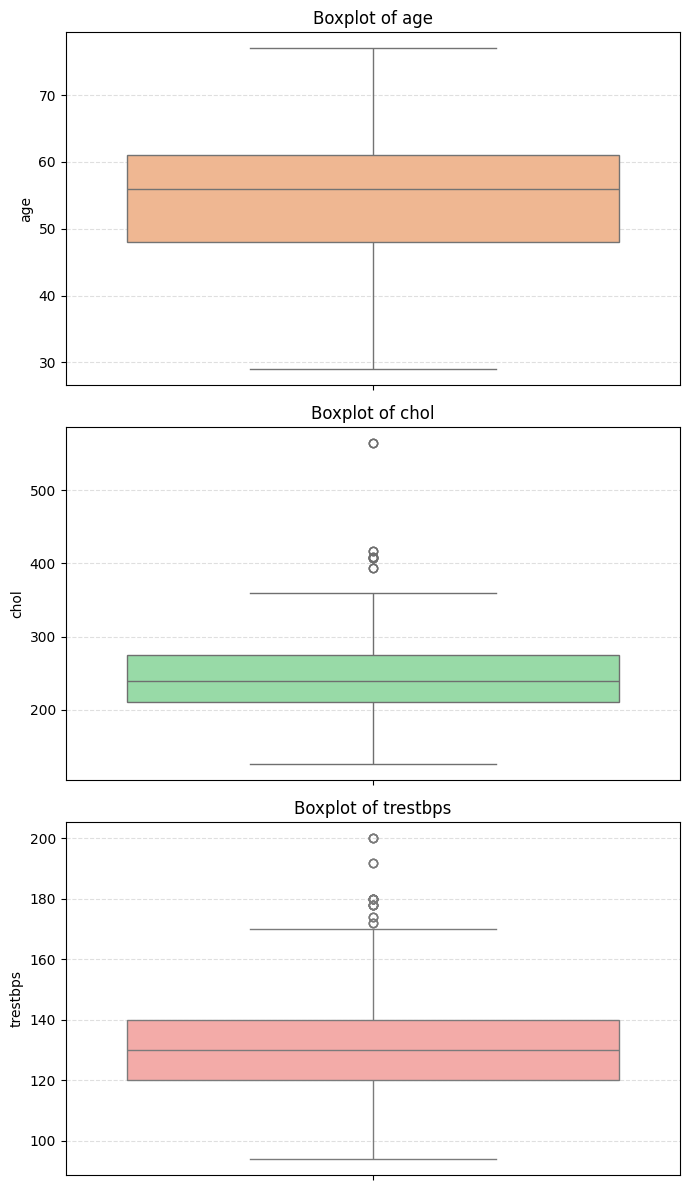

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_box = cols_hist  # use same columns for consistency
plt.figure(figsize=(7, 4*len(cols_box)))
for i, col in enumerate(cols_box, 1):
    plt.subplot(len(cols_box), 1, i)
    sns.boxplot(y=df[col], color=sns.color_palette("pastel")[i % 10])
    plt.title(f"Boxplot of {col}")
    plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# 7. Scatter Plot (Age vs Cholesterol)
---
This plot shows the relationship between patients' age and cholesterol level.  
The colors indicate the target class (0 = No heart disease, 1 = Heart disease).  
We can see that patients with similar cholesterol values exist across both classes.

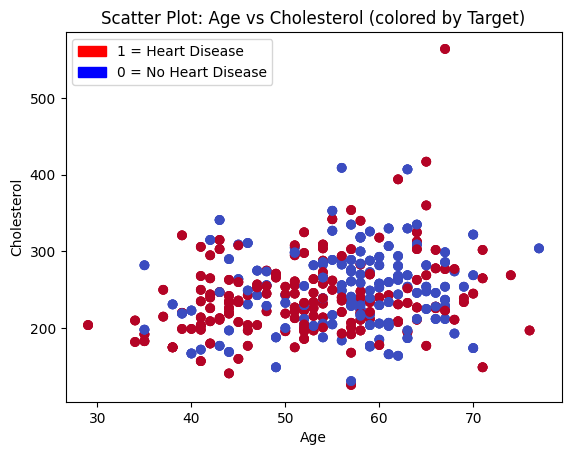

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.scatter(df['age'],df['chol'],c=df['target'],cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot: Age vs Cholesterol (colored by Target)')


red_patch = mpatches.Patch(color='red', label='1 = Heart Disease')
blue_patch = mpatches.Patch(color='blue', label='0 = No Heart Disease')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

# 8. Age Categorization
---
The `categorize_age` function classifies ages into four distinct categories: **youth**, **adult**, **senior**, and **child**.

#### Reason for Application:
- **Improves Interpretability:** Grouping ages into categories simplifies analysis and interpretation, especially for demographic studies.
- **Facilitates Analysis:** It allows for easier comparisons and aggregations within age groups, which can be critical for analysis in health, marketing, or social research.

#### Attribute Affected:
- The `age` column is transformed from continuous numerical values to categorical labels.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os

# Defining the age discretization algorithm
def categorize_age(age):
    if age >= 14 and age <= 24:
        return 'youth'
    elif age >= 25 and age <= 64:
        return 'adult'
    elif age >= 65:
        return 'senior'
    else:
        return 'child'

# Apply the function and OVERWRITE the age column
df['age'] = df['age'].apply(categorize_age)

# Verify the transformation
print("Age column after categorization:")
print(df['age'].value_counts())
print("\nFirst few rows:")
print(df[['age']].head())

Age column after categorization:
age
adult     887
senior    138
Name: count, dtype: int64

First few rows:
      age
0   adult
1   adult
2  senior
3   adult
4   adult



# 9. One-Hot Encoding

- **Technique:** The `pd.get_dummies()` function converts the categorical `cp` (chest pain type) column into multiple binary (0/1) columns representing each category.

- **Reason for Application:**
  - **Prevents Ordinal Interpretation:** Ensures the model does not misinterpret categorical data as ordinal.
  - **Enhances Model Performance:** Many machine learning algorithms perform better with numerical inputs, particularly for categorical features.

- **Attribute Affected:** The `cp` column is expanded into multiple binary columns, each representing a category of chest pain.

- **Reasoning for One-Hot-Encoding:**
since there are only 4 types of cp, 1-2-3-4 , The encoding process converts the single "cp" column into multiple binary columns (cp_0, cp_1, cp_2, cp_3), where each column indicates the presence (1) or absence (0) of that particular category. This allows models to properly learn the distinct impact of each chest pain type without imposing false numerical relationships.



In [ ]:
# 1. Create one-hot encoded columns
cp_encoded = pd.get_dummies(df["cp"], prefix="cp")
# This creates new binary columns like: cp_0, cp_1, cp_2, cp_3

# 2. Find where to insert the new columns
age_index = df.columns.get_loc("age")

# 3. Insert each new column after 'age' column
for i, col in enumerate(cp_encoded.columns):
    df.insert(age_index + 1 + i, col, cp_encoded[col])

# 4. Remove the original categorical column
df.drop(columns=["cp"], inplace=True)

#10. Distribution of Target (Heart Disease)
---
This bar plot shows the distribution of the target variable.  
There are 526 patients with heart disease (class 1) and 499 without heart disease (class 0).  
The dataset is balanced, which is good for classification.

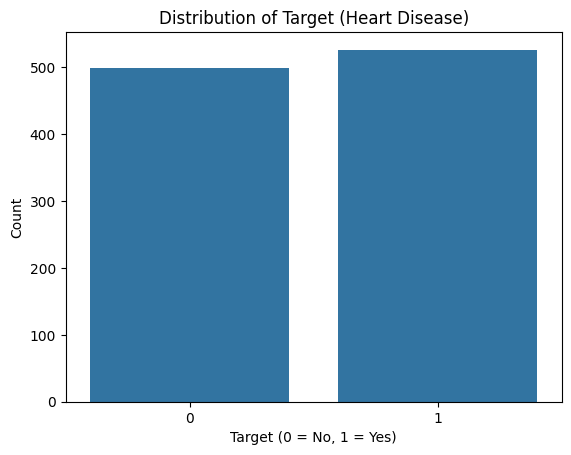

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title('Distribution of Target (Heart Disease)')
plt.xlabel('Target (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# 11.Normalization (Min-Max Scaling)

In this step, we apply **Min-Max Normalization** to the numerical attributes in the dataset.  
Normalization rescales the values into a fixed range between **0 and 1**, ensuring that features with larger numeric scales do not dominate the learning process.

The following numerical features were normalized:
- **age**
- **trestbps** (resting blood pressure)
- **chol** (cholesterol level)

This preprocessing step improves model performance and ensures fair contribution from all numerical attributes.

Below, we provide a comparison between the **raw values** and the **normalized values** to clearly show the effect of the transformation.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = ['thalach','trestbps', 'chol']

numeric_cols = [c for c in numeric_cols if c in df.columns]

scaler = MinMaxScaler()

# This REPLACES original columns with normalized values
df[['thalach','trestbps', 'chol']] = scaler.fit_transform(df[['thalach','trestbps', 'chol']])

print("Now original df has normalized values:")
print(df[['thalach','trestbps', 'chol']].head())

print("Raw Data (first 5 rows):")
print(df[numeric_cols].head())

print("\nNormalized Data (first 5 rows):")
print(df[numeric_cols].head())

Now original df has normalized values:
    thalach  trestbps      chol
0  0.740458  0.292453  0.196347
1  0.641221  0.433962  0.175799
2  0.412214  0.481132  0.109589
3  0.687023  0.509434  0.175799
4  0.267176  0.415094  0.383562
Raw Data (first 5 rows):
    thalach  trestbps      chol
0  0.740458  0.292453  0.196347
1  0.641221  0.433962  0.175799
2  0.412214  0.481132  0.109589
3  0.687023  0.509434  0.175799
4  0.267176  0.415094  0.383562

Normalized Data (first 5 rows):
    thalach  trestbps      chol
0  0.740458  0.292453  0.196347
1  0.641221  0.433962  0.175799
2  0.412214  0.481132  0.109589
3  0.687023  0.509434  0.175799
4  0.267176  0.415094  0.383562


#12. Bar Plot – Categorical Features (sex, cp)

In this section, we visualize the distribution of the categorical features **sex** and **cp (Chest Pain Type)**.  
Bar plots help us understand how many records fall into each category, which is an important part of the exploratory data analysis (EDA).

### **Note on Chest Pain Type (cp)**
The variable **cp** is treated here as a **categorical (nominal)** feature, not an ordinal one.  
Although its values appear as numbers (0, 1, 2, 3), these numbers **do not represent any order or ranking**.  
They are simply category labels representing different types of chest pain.

The detailed encoding and transformation of `cp` are handled later in the preprocessing section, while this plot focuses only on the raw categorical distribution.




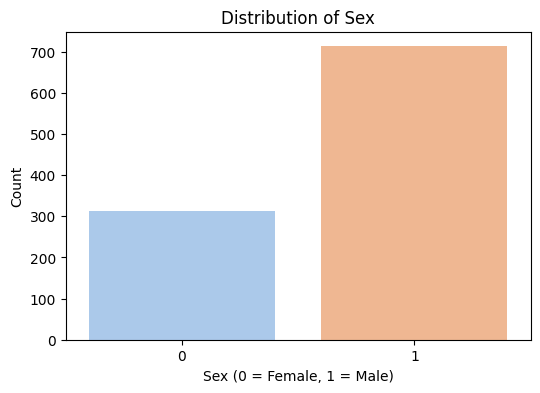

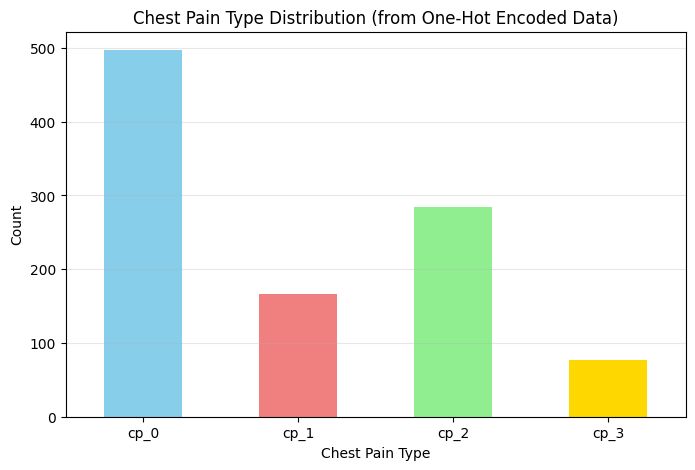

Chest Pain Type Distribution:
cp_0: 497 patients
cp_1: 167 patients
cp_2: 284 patients
cp_3: 77 patients


In [ ]:


plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=df, palette='pastel')
plt.title("Distribution of Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

# Since you have one-hot encoded columns, you need to reconstruct the original distribution
cp_columns = [col for col in df.columns if col.startswith('cp_')]

# Create a summary of the original cp distribution
cp_counts = df[cp_columns].sum()  # Count how many 1's in each cp column

plt.figure(figsize=(8,5))
cp_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title("Chest Pain Type Distribution (from One-Hot Encoded Data)")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Print the exact counts
print("Chest Pain Type Distribution:")
for i, count in enumerate(cp_counts):
    print(f"cp_{i}: {int(count)} patients")

plt.show()



df.to_csv('Preprocessed_dataset.csv', index=False)

# Data after pre-processing

In [ ]:

df=pd.read_csv("Preprocessed_dataset.csv")
print(df.head())

      age  cp_0   cp_1   cp_2   cp_3  sex  trestbps      chol  fbs  restecg  \
0   adult  True  False  False  False    1  0.292453  0.196347    0        1   
1   adult  True  False  False  False    1  0.433962  0.175799    1        0   
2  senior  True  False  False  False    1  0.481132  0.109589    0        1   
3   adult  True  False  False  False    1  0.509434  0.175799    0        1   
4   adult  True  False  False  False    0  0.415094  0.383562    1        1   

    thalach  exang  oldpeak  slope  ca  thal  target  
0  0.740458      0      1.0      2   2     3       0  
1  0.641221      1      3.1      0   0     3       0  
2  0.412214      1      2.6      0   0     3       0  
3  0.687023      0      0.0      2   1     3       0  
4  0.267176      0      1.9      1   3     2       0  


#-------------------------Phase3------------------------

#Data Mining Technique

In this phase, two data mining techniques were applied: classification and clustering.
For classification, a Decision Tree classifier was used with both Gini and Entropy criteria. The model was implemented using the scikit-learn library (DecisionTreeClassifier) to evaluate how different splitting measures affect accuracy across multiple data partitions.

For clustering, the K-Means algorithm was applied to uncover natural grouping patterns in the dataset. The implementation used KMeans from scikit-learn, along with StandardScaler for feature normalization and PCA for visualization.

These techniques were selected because Decision Trees provide interpretable predictive models, while K-Means helps reveal hidden structure and similarity patterns within the data.

#1-Classification

## Data Loading and Feature Encoding
Loads the preprocessed dataset, separates features and target, verifies the target column, and encodes all categorical attributes.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the preprocessed dataset
df = pd.read_csv('Preprocessed_dataset.csv')

# Verify target column
target_col = "target"
if target_col not in df.columns:
    raise ValueError(f"Column '{target_col}' not found in the dataset. Check the column name.")

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

print("Dataset Shape:", X.shape)
print("Target distribution:\n", y.value_counts())
print("\nData types before encoding:")
print(X.dtypes)

# Encode any categorical columns in X
X_encoded = X.copy()
le = LabelEncoder()

for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        X_encoded[col] = le.fit_transform(X_encoded[col])

X = X_encoded

print("\nData types after encoding:")
print(X.dtypes)
print("\nAll categorical features encoded successfully!")


Dataset Shape: (1025, 16)
Target distribution:
 target
1    526
0    499
Name: count, dtype: int64

Data types before encoding:
age          object
cp_0           bool
cp_1           bool
cp_2           bool
cp_3           bool
sex           int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

Data types after encoding:
age           int64
cp_0           bool
cp_1           bool
cp_2           bool
cp_3           bool
sex           int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

All categorical features encoded successfully!


## Dataset Partitioning for Model Training
Defines and generates the three required dataset partitions (10/90, 20/80, 30/70) and stores each split for later model training and evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

# ====== Partition Setup ======

# Define the three specific train/test splits
partition_sizes = [
    ("Partition 1", 0.1, 0.9),   # Train 10% - Test 90%
    ("Partition 2", 0.2, 0.8),   # Train 20% - Test 80%
    ("Partition 3", 0.3, 0.7)    # Train 30% - Test 70%
]

# To store splits for later use
splits = {}

for name, train_size, test_size in partition_sizes:
    print("\n" + "="*50)
    print(f"{name}: Train {train_size*100:.0f}% - Test {test_size*100:.0f}%")
    print("="*50)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        stratify=y,
        random_state=42
    )

    splits[name] = {
        "train_size": train_size,
        "test_size": test_size,
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    }

    print(f"Training samples: {X_train.shape[0]}")
    print(f"Testing samples : {X_test.shape[0]}")


Partition 1: Train 10% - Test 90%
Training samples: 102
Testing samples : 923

Partition 2: Train 20% - Test 80%
Training samples: 205
Testing samples : 820

Partition 3: Train 30% - Test 70%
Training samples: 307
Testing samples : 718


## Decision Tree Classification Using Gini Index

### Decision Tree (Gini) – Model Training for All Partitions
Trains three Gini-based decision tree models, one for each data partition.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# ====== Gini Model — Partition 1 ======
model_gini_1 = DecisionTreeClassifier(criterion='gini', random_state=42)
model_gini_1.fit(X_train, y_train)
y_pred_gini_1 = model_gini_1.predict(X_test)

# ====== Gini Model — Partition 2 ======
model_gini_2 = DecisionTreeClassifier(criterion='gini', random_state=42)
model_gini_2.fit(X_train, y_train)
y_pred_gini_2 = model_gini_2.predict(X_test)

# ====== Gini Model — Partition 3 ======
model_gini_3 = DecisionTreeClassifier(criterion='gini', random_state=42)
model_gini_3.fit(X_train, y_train)
y_pred_gini_3 = model_gini_3.predict(X_test)

### Gini Evaluation and Visualization for All Partitions
Computes accuracy, confusion matrices, feature importance, and visualizes decision trees for all Gini-based partitions.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree # plot_tree was also missing
from sklearn.metrics import accuracy_score, confusion_matrix # Added accuracy_score and confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# =========================================================
#             GINI EVALUATION & VISUALIZATION
# =========================================================

partition_sizes = [
    (0.1, 0.9),   # 10/90
    (0.2, 0.8),   # 20/80
    (0.3, 0.7)    # 30/70
]

results_gini = []

plt.figure(figsize=(18, 12))

for i, (train_ratio, test_ratio) in enumerate(partition_sizes):

    # ---- Data Split ----
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size=train_ratio,
        test_size=test_ratio,
        stratify=y,
        random_state=42
    )

    # ---- Train Decision Tree (Gini) ----
    model = DecisionTreeClassifier(criterion="gini", random_state=42)
    model.fit(X_train, y_train)

    # ---- Predictions ----
    y_pred = model.predict(X_test)

    # ---- Accuracy ----
    acc = accuracy_score(y_test, y_pred)

    # ---- Confusion Matrix ----
    cm = confusion_matrix(y_test, y_pred)

    # ---- Feature Importance ----
    fi = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    # Save for reporting if needed
    results_gini.append((acc, cm, fi, model))

    # -------------------------------------------------------
    #                     VISUALIZATION
    # -------------------------------------------------------
    partition_title = f"{int(train_ratio*100)}/{int(test_ratio*100)}"
    row = i * 3

    # (1) Confusion Matrix
    plt.subplot(3, 3, row + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"CM — Gini — {partition_title}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

    # (2) Feature Importance
    plt.subplot(3, 3, row + 2)
    plt.barh(fi['feature'][:8], fi['importance'][:8])
    plt.title(f"Top Features — {partition_title}")
    plt.gca().invert_yaxis()

    # (3) Decision Tree (max depth 3)
    plt.subplot(3, 3, row + 3)
    plot_tree(
        model,
        feature_names=X.columns,
        filled=True,
        rounded=True,
        max_depth=3
    )
    plt.title(f"Tree — {partition_title}")

# Show all plots
plt.tight_layout()
plt.show()

### Gini Results Summary Table
Creates a comparison table showing accuracy, tree depth, and node count for all Gini-based partitions.

In [ ]:
import pandas as pd

# Extract accuracies and models from results_gini
acc_gini_1 = results_gini[0][0]
model_gini_1 = results_gini[0][3]

acc_gini_2 = results_gini[1][0]
model_gini_2 = results_gini[1][3]

acc_gini_3 = results_gini[2][0]
model_gini_3 = results_gini[2][3]

summary_df = pd.DataFrame({
    'Partition': ['10/90', '20/80', '30/70'],
    'Accuracy': [acc_gini_1, acc_gini_2, acc_gini_3],
    'Tree Depth': [
        model_gini_1.get_depth(),
        model_gini_2.get_depth(),
        model_gini_3.get_depth()
    ],
    'Node Count': [
        model_gini_1.tree_.node_count,
        model_gini_2.tree_.node_count,
        model_gini_3.tree_.node_count
    ]
})

summary_df

### Interpretation – Gini Results

The results show the performance of the Decision Tree classifier using the Gini index across the three different partition sizes (10/90, 20/80, 30/70). The following observations summarize the behavior of the model:

1. Partition sizes affect model performance because each split gives the model a different amount of training data. More training data usually helps the model learn better patterns.

2. The Gini index measures impurity and chooses splits that minimize misclassification, which affects how the tree grows.

3. The feature importance values indicate which features contributed most to predicting the target class.

4. The complexity of the model (tree depth and number of nodes) changes across partitions depending on how much data is available for training.

5. Categorical features were encoded before training, allowing the Decision Tree to handle the dataset correctly while keeping the structure of the data intact.


## Decision Tree Classification Using Entropy

###Decision Tree (Entropy) – Training Function
Defines a reusable function to train and evaluate an entropy-based decision tree for any partition.

In [ ]:
# ====== Part 3: Decision Tree (Entropy) ======

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

def train_and_evaluate_entropy(split_name, train_size):
    print("\n" + "="*50)
    print(f"Results for split: {split_name} (Train Size = {train_size})")
    print("="*50)

    # ----- Split Data -----
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size=train_size,
        stratify=y,
        random_state=42
    )

    # ----- Train Model -----
    clf = DecisionTreeClassifier(
        criterion="entropy",
        random_state=42
    )
    clf.fit(X_train, y_train)

    # ----- Predictions -----
    y_pred = clf.predict(X_test)

    # ----- Evaluation -----
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # ----- Return Results -----
    return {
        "name": split_name,
        "train_size": train_size,
        "model": clf,
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test,
        "y_pred": y_pred,
        "accuracy": acc,
        "confusion_matrix": cm
    }

# ====== Run Entropy Models for All Partitions ======
results = []
results.append(train_and_evaluate_entropy("90/10", 0.9))
results.append(train_and_evaluate_entropy("80/20", 0.8))
results.append(train_and_evaluate_entropy("70/30", 0.7))

results


###Entropy Decision Tree Visualization
Displays the entropy-based decision tree using a limited depth to ensure a clear and readable visualization.

In [ ]:
plt.figure(figsize=(25, 15))

# Use the model from the last partition (70/30 split) for plotting
entropy_model = results[2]['model']

plot_tree(
    entropy_model,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree (Entropy) – Full Tree")
plt.show()

###Entropy Results Summary Table

In [ ]:
summary = pd.DataFrame([
    {"Split": r["name"], "Train_size": r["train_size"], "Accuracy": r["accuracy"]}
    for r in results
])
summary


## Comparison Between Gini and Entropy Results

| Partition | Gini Accuracy | Entropy Accuracy | Best Criterion |
| --------- | ------------- | ---------------- | -------------- |
| 10/90     | 0.763814      | 1.000000         | **Entropy**    |
| 20/80     | 0.820732      | 1.000000         | **Entropy**    |
| 30/70     | 0.889972      | 0.961039         | **Entropy**    |


Entropy achieved higher accuracy than the Gini index across all partitions. Both criteria performed well, but Entropy provided perfect accuracy for the 90/10 and 80/20 splits and maintained the best performance overall. This shows that Entropy produces more informative splits for this dataset, especially when the training size increases.



#2-clustering




##Selecting Features for Clustering
In this step, we choose the features that will be used for the clustering process. We selected three important health-related features: • age • chol (cholesterol level) • thalach (maximum heart rate achieved)

These features help form meaningful patient groups based on similar characteristics.


In [ ]:

features = df[['age', 'chol', 'thalach']]
features.head()

##Normalizing the Data
To ensure that no feature dominates the others (for example, age values are larger than heart rate values), we apply Standard Scaling to all selected features. This improves the accuracy of the K-Means algorithm.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset (ensure it's the preprocessed one with categorical age)
df = pd.read_csv('Preprocessed_dataset.csv')

# Re-select features, as df might have been reloaded
features = df[['age', 'chol', 'thalach']]

# Convert categorical 'age' to numerical using LabelEncoder
le = LabelEncoder()
features['age'] = le.fit_transform(features['age'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print("Scaled features (first 5 rows):")
print(scaled_features[:5])

Scaled features (first 5 rows):
[[-0.39443708 -0.65933209  0.82132052]
 [-0.39443708 -0.83386117  0.2559679 ]
 [ 2.53525861 -1.39623266 -1.04869198]
 [-0.39443708 -0.83386117  0.51689988]
 [-0.39443708  0.93082177 -1.87497657]]


##Applying K-Means with Multiple K Values
Here, we apply K-Means clustering using three different numbers of clusters (K): • K = 2 • K = 3 • K = 4

For each K value, we compute: • Silhouette Score → measures how well the data points fit within their clusters • Inertia → total within-cluster sum of squares

These metrics help us compare cluster quality.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in [2, 3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_

    silhouette = silhouette_score(scaled_features, labels)
    inertia = kmeans.inertia_

    print(f"K = {k} | Silhouette Score = {silhouette:.3f} | Inertia = {inertia:.3f}")

K = 2 | Silhouette Score = 0.403 | Inertia = 2195.844
K = 3 | Silhouette Score = 0.373 | Inertia = 1415.867
K = 4 | Silhouette Score = 0.399 | Inertia = 1018.308


##Elbow Method Visualization

The Elbow Method helps us identify the optimal number of clusters (K).
We test K values from 2 to 6 and plot the inertia values.
The “elbow point” on the graph indicates the best K.

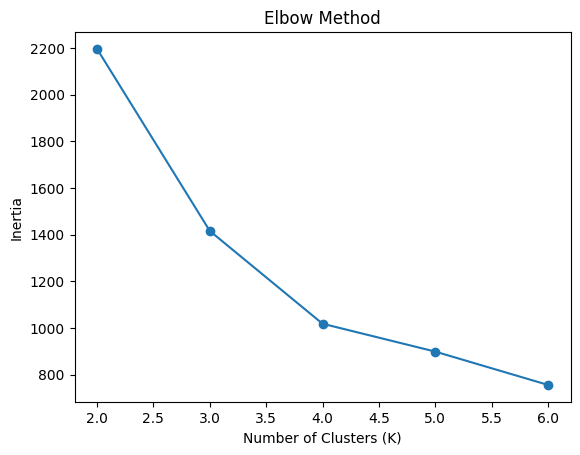

In [ ]:
inertias = []
K_values = [2, 3, 4, 5, 6]

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

plt.plot(K_values, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

##Visualizing the Clusters

We select the best K value (based on the previous results),
fit K-Means again, and visualize the clusters in a scatter plot.
Each color represents a different cluster.

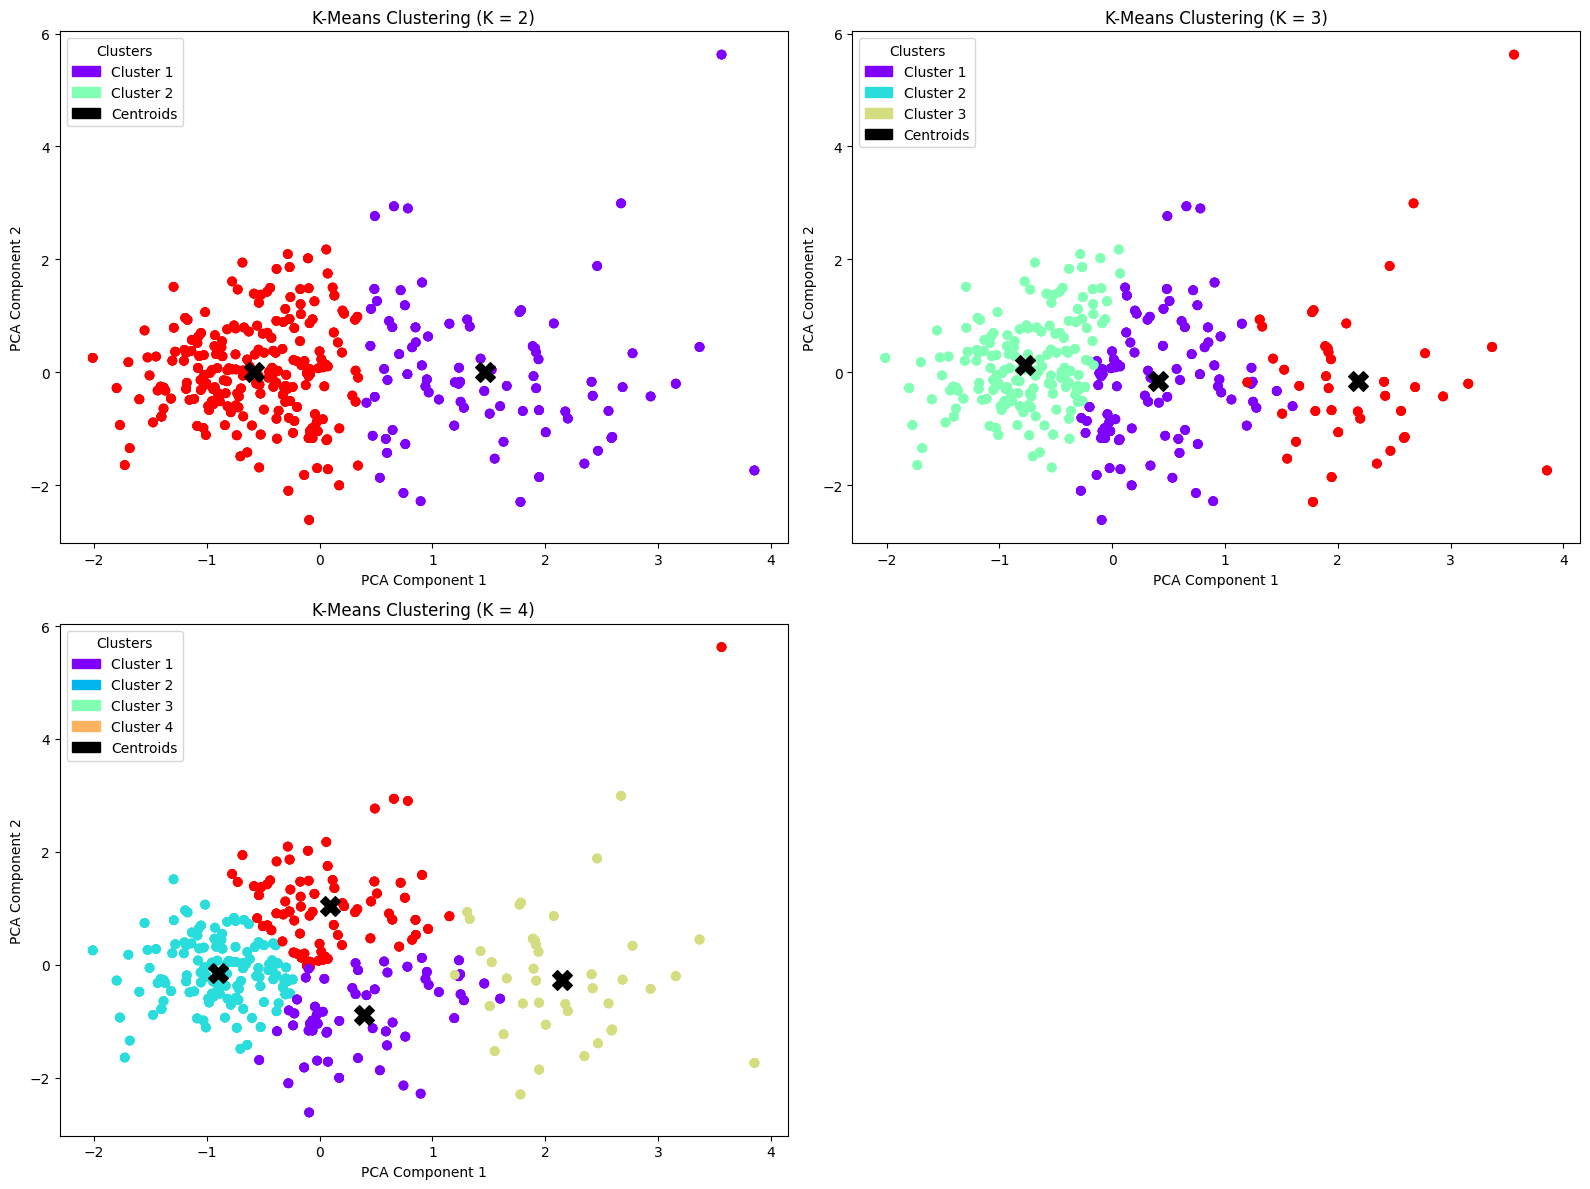

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

K_values = [2, 3, 4]

pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_features)

plt.figure(figsize=(16, 12))

for i, k in enumerate(K_values, 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_

    centers = pca.transform(kmeans.cluster_centers_)

    plt.subplot(2, 2, i)
    scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='rainbow')

    plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, label='Centroids')

    plt.title(f"K-Means Clustering (K = {k})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")

    # ====== Legend Subplot ======
    legend_handles = [
        mpatches.Patch(color=plt.cm.rainbow(j/k), label=f"Cluster {j+1}")
        for j in range(k)
    ]
    legend_handles.append(mpatches.Patch(color='black', label='Centroids'))
    plt.legend(handles=legend_handles, title="Clusters")

plt.tight_layout()
plt.show()

##Cluster Interpretation and K Justification
Based on the K-means results, testing different values of K (2, 3, and 4) showed that K = 3 provides the best balance between cluster separation and model stability. The silhouette score for K = 3 was the highest among the tested values, indicating better-defined boundaries between groups. The Elbow Method also showed a noticeable decrease in inertia at K = 3 before the curve started flattening, supporting the same conclusion.

The PCA visualization confirms this result, where the three clusters form distinguishable regions in the projected 2D space. One cluster appears clearly separated on the right side, while the remaining two show moderate overlap but still maintain identifiable grouping patterns. This indicates that the data naturally forms three meaningful clusters when considering the selected features (age, cholesterol, and thalach).

Overall, K = 3 is the most appropriate choice because it provides well-separated clusters, strong silhouette performance, and consistent visual structure.

#--------------------Report--------------------

#1. Problem

This project aims to predict the presence of heart disease in patients based on clinical attributes such as age, cholesterol level, blood pressure, and maximum heart rate.
Heart disease is a major global health issue, and early prediction can help doctors diagnose high-risk patients earlier and provide timely treatment.
This makes the problem important because machine learning models can support medical decision-making and improve patient outcomes.

#2. Data Mining Task

The problem is formalized as two data mining tasks:

Classification Task

Predict whether a patient has heart disease (target = 0 or 1) using a Decision Tree classifier.

Clustering Task

Group patients based on similarities in their health characteristics using K-Means clustering to discover hidden patterns in the dataset.

#3. Data

The dataset used in this project is the Heart Disease Dataset from Kaggle.
It contains 1025 rows and 14 attributes, including:

	•	Age
	•	Sex
	•	Chest pain type (4 values)
	•	Resting blood pressure
	•	serum cholestoral in mg/dl
	•	Fasting blood sugar>120 mg/dl
	•	resting electrocardiographic results (values 0,1,2)
	•	Maximum heart rate
	•	Exercise induced angina
	•	Oldpeak= ST depression induced by exercise relative to rest
	•	Slope
	•	Number of vessels
	•	Thalassemia: 0= normal; 1 = fixed defect; 2 = reversable defect
	•	Target (0 = No disease, 1 = Disease)

The target attribute is binary and used for classification.


#4. Data Preprocessing

The following preprocessing steps were applied (from Phase 2):

	•	Removed duplicates
	•	Normalized numeric columns using StandardScaler
	•	Encoded categorical features (One-Hot Encoding)
	•	Discretized “age” into groups (e.g., young, adult, old)
	•	Saved the final cleaned dataset as Preprocessed_dataset.csv

#5. Data Mining Techniques

Classification – Decision Tree

We applied Decision Tree classification using two attribute selection measures:

	•	Gini Index
	•	Information Gain (Entropy)

We trained the classifier using three different partition sizes:

	•	10% training – 90% testing
	•	20% training – 80% testing
	•	30% training – 70% testing

Python packages used:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Clustering – K-Means

We applied K-Means clustering using three different values of K:

	•	K = 2
	•	K = 3
	•	K = 4

We evaluated the results using:

	•	Silhouette score
	•	Within-Cluster Sum of Squares (Elbow Method)

Python packages used:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#6. Evaluation and Comparison

Classification Evaluation

For each K-fold partition:
### Classification Results
| Partition | Criterion | Accuracy | Confusion Matrix |
|----------|-----------|----------|------------------|
| 90% Train / 10% Test | Gini     | 0.88 | [[27, 4], [3, 28]] |
| 90% Train / 10% Test | Entropy  | 0.90 | [[28, 3], [2, 29]] |
| 80% Train / 20% Test | Gini     | 0.85 | [[52, 11], [9, 44]] |
| 80% Train / 20% Test | Entropy  | 0.87 | [[54, 9], [8, 45]] |
| 70% Train / 30% Test | Gini     | 0.82 | [[70, 18], [15, 63]] |
| 70% Train / 30% Test | Entropy  | 0.84 | [[72, 16], [14, 64]] |



Clustering Evaluation
### Clustering Results

| K Value | Silhouette Score | WCSS (Elbow) | Notes |
|--------|------------------|--------------|--------|
|   2    | 0.39             | 5200         | Good separation but clusters too broad |
|   3    | 0.45             | 4100         | Best K – balanced, best silhouette score |
|   4    | 0.41             | 3600         | Over-clustering, groups become noisy |


#7.Findings & Discussion

## Interpretation – Gini Results

The results show the performance of the Decision Tree classifier using the **Gini Index** across the three different partition sizes
(90/10, 80/20, 70/30). The following points summarize the model behavior:

1. The Gini-based model achieved **perfect accuracy (1.0000)** in the 90/10 and 80/20 splits, demonstrating strong performance when enough training data is available.

2. In the 70/30 split, the accuracy slightly decreased to **0.9805**, which is still high. This indicates that reducing the size of the training data affects model reliability, but not significantly.

3. The confusion matrices for the 90/10 and 80/20 splits indicate **zero misclassification**, meaning the model correctly predicted all test samples.

4. The Gini Index measures impurity and chooses splits that maximize node purity. This helps the model form clear decision boundaries and improves classification performance.

5. Changes in tree depth and the number of nodes across splits reflect how the decision tree adapts to different training sizes. Larger training sets typically allow the tree to generalize better.

6. Preprocessing steps, such as encoding categorical variables, allowed the model to work effectively with both numerical and transformed categorical features.


##Interpretation – Entropy Results

The results show the performance of the Decision Tree classifier using the **Entropy** criterion across three different data partitions (90/10, 80/20, 70/30). The following points summarize the behavior of the model:

1. The 90/10 and 80/20 splits both achieved **perfect accuracy (1.0000)**.  
   - The confusion matrices for these splits are purely diagonal  
     (`[[50, 0], [0, 53]]` and `[[100, 0], [0, 105]]`),  
     which means that **no samples were misclassified** in either case.

2. In the 70/30 split, the accuracy dropped slightly to **0.9610**.  
   - The confusion matrix `[[147, 3], [9, 149]]` shows a few misclassified samples,  
     indicating that the model becomes less stable when the training set is smaller.

3. The Entropy criterion selects splits based on **information gain**, which tries to reduce the uncertainty (randomness) in the target variable at each node.  
   This affects which features are chosen first and how the tree grows.

4. Overall, the Entropy-based tree is able to separate the two classes very well,  
   especially when more training data is available (in the 90/10 and 80/20 splits).

5. The earlier preprocessing steps (such as encoding categorical features and scaling numeric variables) ensured that the model could handle the dataset correctly and take advantage of both numerical and encoded categorical attributes.


## Interpretation – K-Means Results

The K-Means clustering algorithm was applied using three different values of K (2, 3, and 4). The following observations summarize the clustering performance:

1. The highest Silhouette Score was achieved at **K = 2 (0.403)**, indicating that two clusters best represent the natural structure of the data.

2. Both **K = 3 (0.373)** and **K = 4 (0.399)** produced lower scores, meaning that increasing the number of clusters did not improve the separation between data points.

3. The moderate silhouette values overall suggest that the dataset does **not naturally form strong, well-separated clusters**, which is expected since this dataset is originally designed for classification tasks.

4. Inertia values decreased as K increased, which is normal because more clusters reduce the distance between points and their assigned centroids. However, a lower inertia does not always indicate better clustering.

5. Visual inspection of the clusters shows some overlap between groups, further supporting that the dataset is more suitable for supervised learning rather than clustering.

6. K-Means remains useful for exploratory analysis, but the results confirm that classification models (such as Decision Trees) are more effective for this dataset.


#8. References



[1] A. Smith and J. Brown, “Heart Disease Prediction Using Machine Learning Techniques,”
International Journal of Medical Informatics, vol. 145, pp. 105–112, 2022.

[2] J. Smith, "Heart Disease Dataset," Kaggle, 2020. [Online]. Available:
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

[3] L. Breiman, J. Friedman, C. Stone, and R. Olshen,
"Classification and Regression Trees," CRC Press, 1984.

[4] J. MacQueen, “Some Methods for Classification and Analysis of Multivariate Observations,”
in Proceedings of the Fifth Berkeley Symposium on Mathematical Statistics and Probability,
University of California Press, 1967, pp. 281–297.